In [ ]:
#%cd ..
import os
os.chdir('/home/skpark/git/pose-detection-keypoints-estimation-yolov8/')

In [ ]:
# Import library
import cv2
import numpy as np
from PIL import Image
from src.detection_keypoint import DetectKeypoint
from src.classification_keypoint import KeypointClassification
detection_keypoint = DetectKeypoint( yolov8_model= 'yolov8m-pose')

In [ ]:

#classification_keypoint = KeypointClassification(    '/home/skpark/git/yolov8/models/pose_classification.pt')

In [ ]:
# run
image = cv2.imread('/home/skpark/git/pose-detection-keypoints-estimation-yolov8/dog2.jpg')
results = detection_keypoint(image)

In [ ]:
results.keypoints
print(results)
height, width = image.shape[:2]
for keypoint_indx, keypoint in enumerate(results.keypoints.xyn.cpu().numpy()[0]):

    cv2.putText(image, str(keypoint_indx), (int(keypoint[0]*width  ) , int(keypoint[1]*height ) ),
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)


Image.fromarray(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))



In [ ]:
results_keypoint = detection_keypoint.get_xy_keypoint(results)

#input_classification = results_keypoint[10:]
#results_classification = classification_keypoint(input_classification)
#results_classification

In [ ]:
## Visualise Keypoint
height, width = image.shape[:2]

image_draw = results.plot(boxes=False)

x_min, y_min, x_max, y_max = results.boxes.xyxy[0].cpu().numpy()
image_draw = cv2.rectangle(
                image_draw,
                (int(x_min), int(y_min)),(int(x_max), int(y_max)),
                (0,0,255), 2
            )
(w, h), _ = cv2.getTextSize(
        results_classification.upper(),
        cv2.FONT_HERSHEY_SIMPLEX, 0.5, 2
    )
image_draw = cv2.rectangle(
                image_draw,
                (int(x_min), int(y_min)-20),(int(x_min)+w, int(y_min)),
                (0,0,255), -1
            )
cv2.putText(image_draw,
            f'{results_classification.upper()}',
            (int(x_min), int(y_min)-4),
            cv2.FONT_HERSHEY_SIMPLEX,
            0.5, (255, 255, 255),
            thickness=2
        )

print(f'Keypoint classification : {results_classification}')
Image.fromarray(cv2.cvtColor(image_draw, cv2.COLOR_BGR2RGB))

In [ ]:
## Visualise Keypoint
height, width = image.shape[:2]

image_draw = image.copy()
for idx in range(0, len(results_keypoint), 2):
    x, y = results_keypoint[idx], results_keypoint[idx+1]
    if x == 0 or x == 1: continue
    if y == 0 or y == 1: continue
    x, y = int(x*width), int(y*height)
    # visualize point
    image_draw = cv2.circle(image_draw, (x,y), 2, (255,255,0), 2)
    image_draw = cv2.putText(image_draw, str(idx), (x,y), cv2.FONT_HERSHEY_SIMPLEX, 0.3,  (255,0,255),1)

print(f'Keypoint classification : {results_classification}')
Image.fromarray(cv2.cvtColor(image_draw, cv2.COLOR_BGR2RGB))


image 1/1 /home/skpark/git/pose-detection-keypoints-estimation-yolov8/dog/bodylower/frame_0_timestamp_0.jpg: 640x384 2 quadrupeds, 64.5ms
Speed: 1.0ms preprocess, 64.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 384)


ultralytics.yolo.engine.results.Results object with attributes:

boxes: ultralytics.yolo.engine.results.Boxes object
keypoints: ultralytics.yolo.engine.results.Keypoints object
keys: ['boxes', 'keypoints']
masks: None
names: {0: 'quadruped'}
orig_img: array([[[ 48,  33,  31],
        [ 48,  33,  31],
        [ 48,  33,  31],
        ...,
        [114, 114, 114],
        [114, 114, 114],
        [114, 114, 114]],

       [[ 48,  33,  31],
        [ 48,  33,  31],
        [ 48,  33,  31],
        ...,
        [114, 114, 114],
        [114, 114, 114],
        [114, 114, 114]],

       [[ 48,  33,  31],
        [ 48,  33,  31],
        [ 48,  33,  31],
        ...,
        [115, 115, 115],
        [115, 115, 115],
        [115, 115, 115]],

       ...,

       [[189, 200, 208],
        [190, 201, 209],
        [190, 201, 209],
        ...,
        [190, 199, 208],
        [192, 201, 210],
        [192, 201, 210]],

       [[189, 200, 208],
        [190, 201, 209],
        [190, 201, 209],


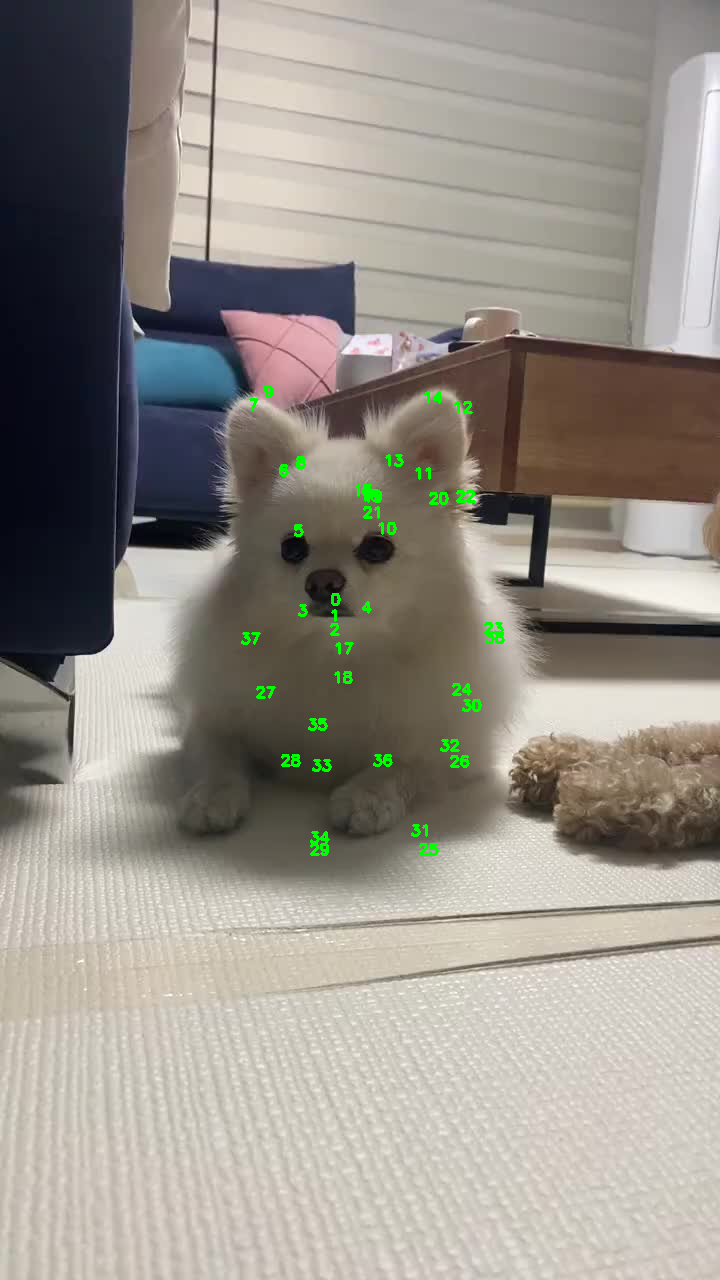

In [ ]:
from ultralytics import YOLO
import cv2
from PIL import Image

model_path = '/home/skpark/git/pose-detection-keypoints-estimation-yolov8/runs/pose/train6/weights/best.pt'

#image_path = '/home/skpark/git/pose-detection-keypoints-estimation-yolov8/data/images/train/zebra_10743.jpg'
image_path = '/home/skpark/git/pose-detection-keypoints-estimation-yolov8/dog/bodylower/frame_0_timestamp_0.jpg'
img = cv2.imread(image_path)

model = YOLO(model_path)

results = model(image_path)[0]
print(results)
height, width = img.shape[:2]

for keypoint_indx, keypoint in enumerate(results[0].keypoints.xyn.cpu().numpy()[0]):

    cv2.putText(img, str(keypoint_indx), (int(keypoint[0]*width  ) , int(keypoint[1]*height ) ),
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)


Image.fromarray(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))